In [481]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


## Data Exploration

In [482]:
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


* Pclass: Passenger Class ( 1st; 2 2nd; 3 = 3rd)
* survived Survival (0 No; 1= Yes)
* name: Name (can be of diffrent Rank Mr/Mrs/Miss/Sir...etc) 
* sex Sex (male, female)
* age Age (#number of months)
* sibsp Number of Siblings/Spouses Aboard
* parch: Number of Parents/Children Aboard 
* ticket: Ticket Number
* fare: Passenger Fare (British pound)
* cabin
* embarked :Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [483]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


* Total entries : 418 rows
* Sex is a String
* Embarked is a String
* null values Age & Cabin & Fare

In [485]:
# Another Way to get the missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

* check for inconsistent data

In [486]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

* As we see For Sex we have only 2 different values
* Same for Pclass 3 values
* Same for Embarked

<Axes: xlabel='Age'>

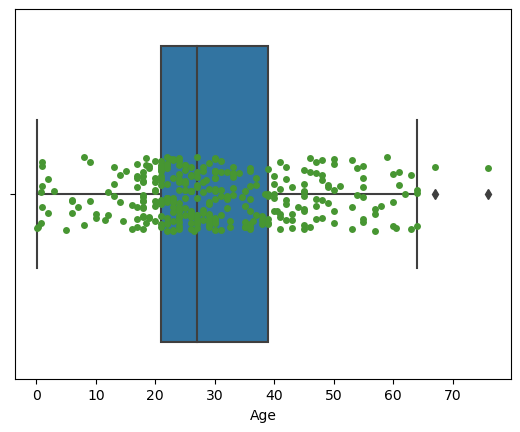

In [487]:
# Getting Outliers
sns.boxplot(x='Age',data = df )
sns.stripplot(x='Age',data=df,color='#479632')

* there is some outliers

<Axes: ylabel='Pclass'>

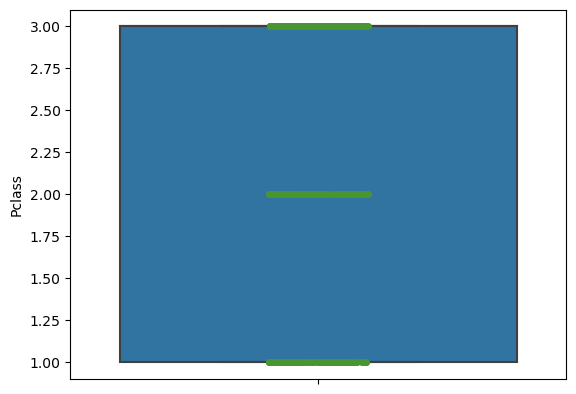

In [488]:
sns.boxplot(y='Pclass',data = df )
sns.stripplot(y='Pclass',data=df,color='#479632')

<Axes: xlabel='SibSp'>

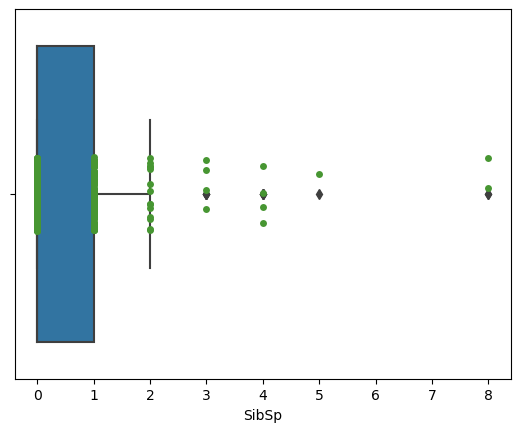

In [489]:
sns.boxplot(x='SibSp',data = df )
sns.stripplot(x='SibSp',data=df,color='#479632')

In [490]:
# Getting the correlation
mycols = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']
mydf = df[mycols]
mydf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,NaN,S
414,1,1,female,39.0,0,0,108.9000,C105,C
415,0,3,male,38.5,0,0,7.2500,NaN,S
416,0,3,male,NaN,0,0,8.0500,NaN,S


C:\Users\yassi\AppData\Local\Temp\ipykernel_7152\4181950921.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mydf.corr(),annot=True)


<Axes: >

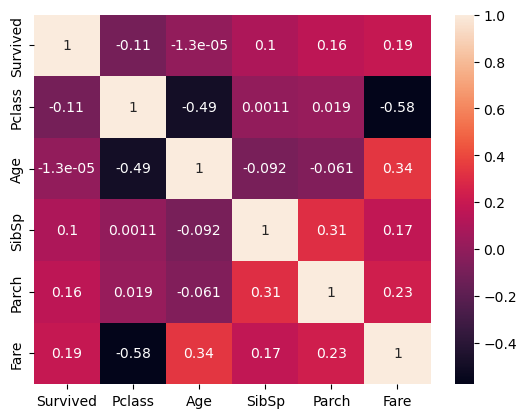

In [491]:
sns.heatmap(mydf.corr(),annot=True)

### Visualisation PLOTS

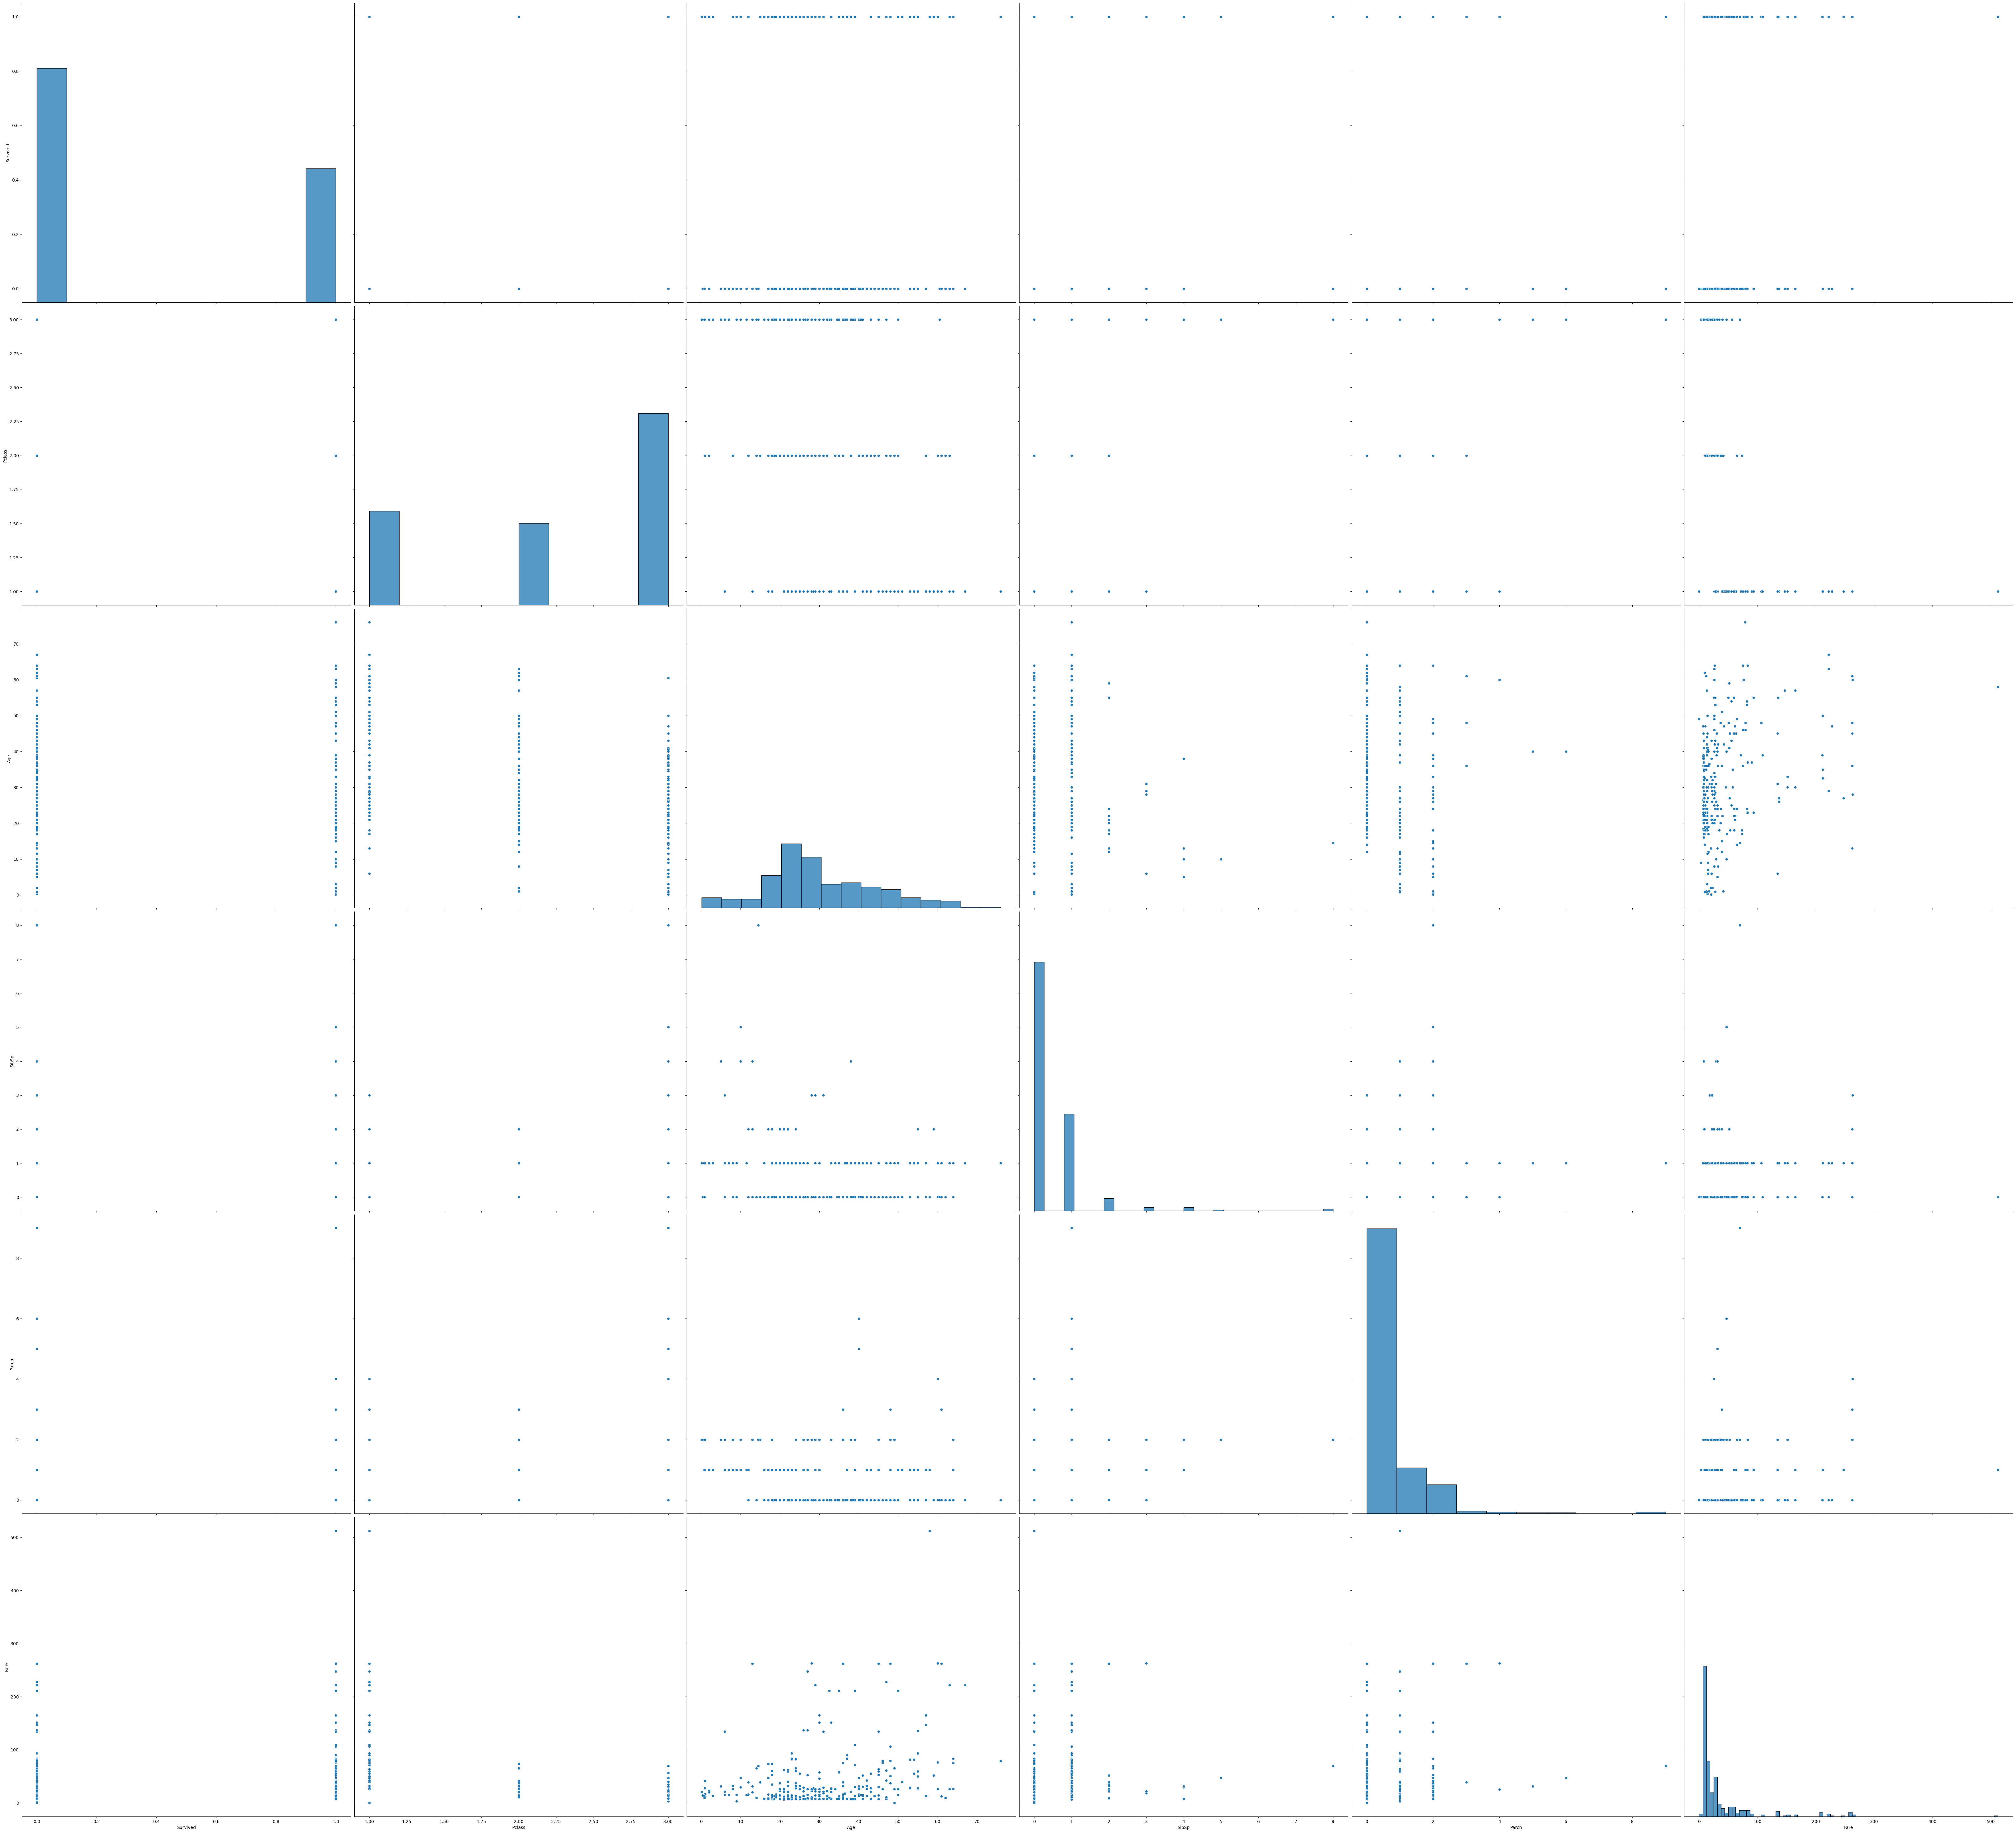

In [492]:
sns.pairplot(mydf, height=10,aspect=1.1)

<Axes: xlabel='Survived', ylabel='count'>

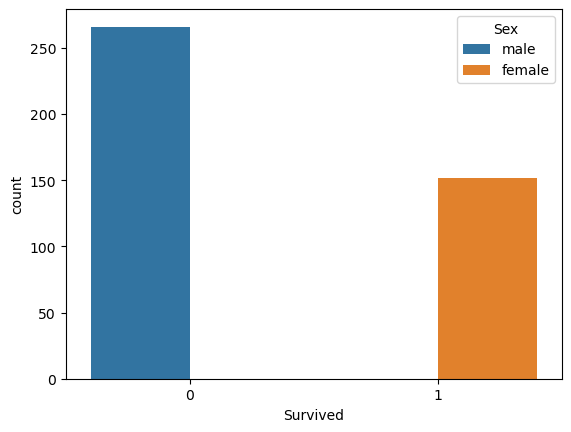

In [493]:
sns.countplot(x='Survived',hue='Sex',data=df)

* We remark that only male who died and only female who survived

In [494]:
df.groupby('Sex').count()['Survived']

Sex
female    152
male      266
Name: Survived, dtype: int64

In [495]:
count_test = df.groupby('Sex')[ 'Survived'].sum()
count_test

Sex
female    152
male        0
Name: Survived, dtype: int64

In [496]:
labels = df.groupby('Sex')[ 'Survived'].count().index
labels

Index(['female', 'male'], dtype='object', name='Sex')

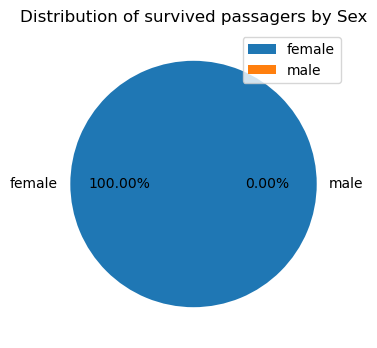

In [497]:
count_test = df.groupby('Sex')[ 'Survived'].sum()
plt.figure(figsize=(12,4))
plt.pie(count_test,labels=labels,autopct='%.2f%%') #'%.2f%%' to get the percentage
plt.legend(labels)
plt.title('Distribution of survived passagers by Sex')
plt.show()


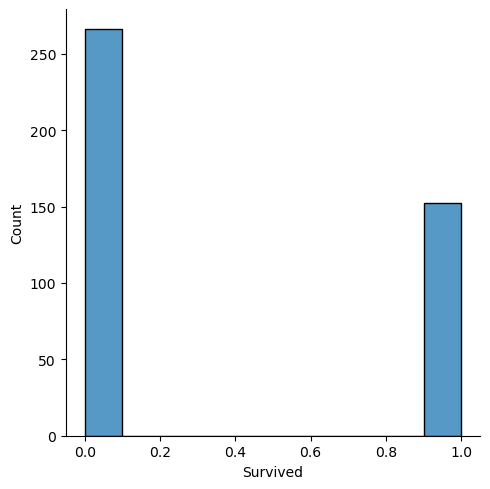

In [498]:
sns.displot(df['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

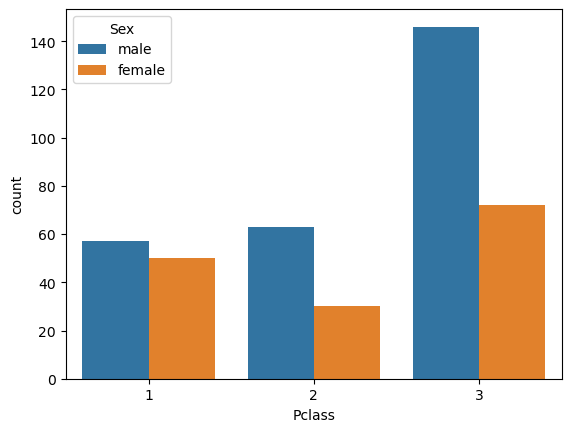

In [499]:
sns.countplot(x='Pclass',hue='Sex',data=df)

*  Overall , number of Men > number of Women

<Axes: xlabel='Pclass', ylabel='count'>

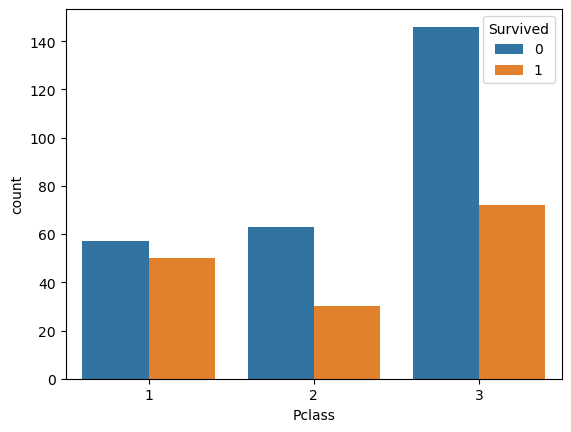

In [500]:
sns.countplot(x='Pclass',hue='Survived',data=df)

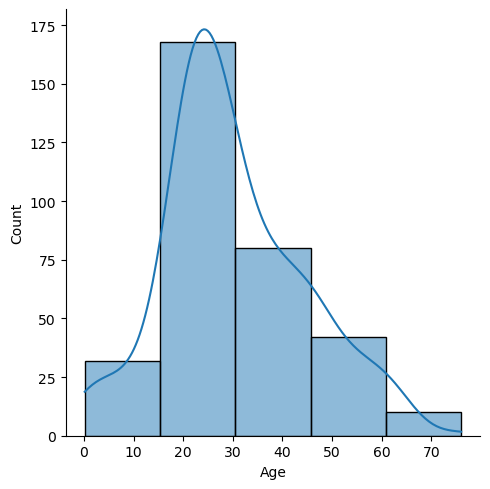

In [501]:
sns.displot(df['Age'],bins=5,kde=True)

# Start Feature Engineering

In [502]:
def extract_title(name):
    title=name.split(',')[1].split('.')[0]
    if(title.strip() == 'Mr'):
        return 0 
    if(title.strip() == 'Mrs'):
        return 1
    if(title.strip() == 'Miss'):
        return 3 
    else : 
        return None

df['Rank']=df['Name'].apply(extract_title)
# when we use the df['col'].apply(func)-> automaticlly func take the values of df['col'] as arguments

In [503]:
#df = df.dropna()

In [504]:
df['Rank'].value_counts()

0.0    240
3.0     78
1.0     72
Name: Rank, dtype: int64

<Axes: xlabel='Rank', ylabel='count'>

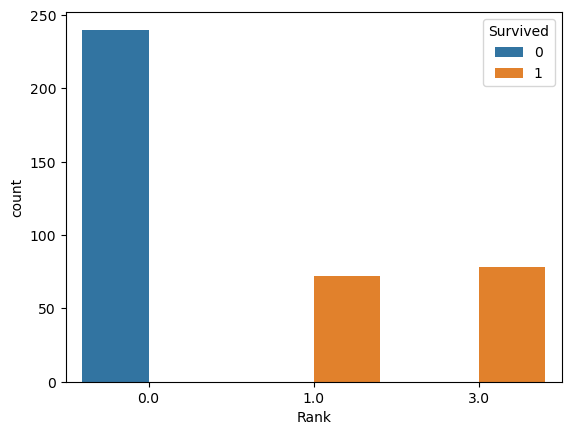

In [505]:
sns.countplot(x='Rank',hue='Survived',data=df)

<Axes: xlabel='Rank', ylabel='count'>

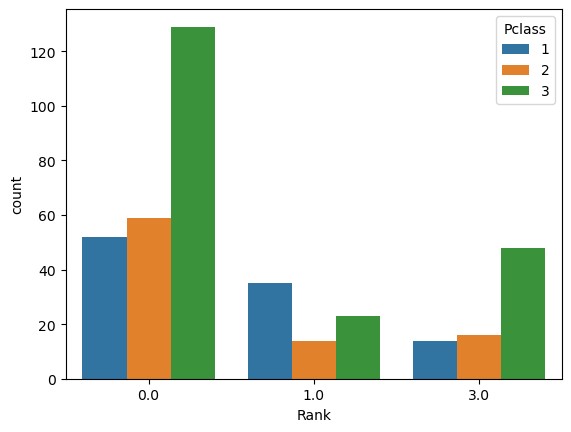

In [506]:
sns.countplot(x='Rank',hue='Pclass',data=df)

<Axes: xlabel='Embarked', ylabel='count'>

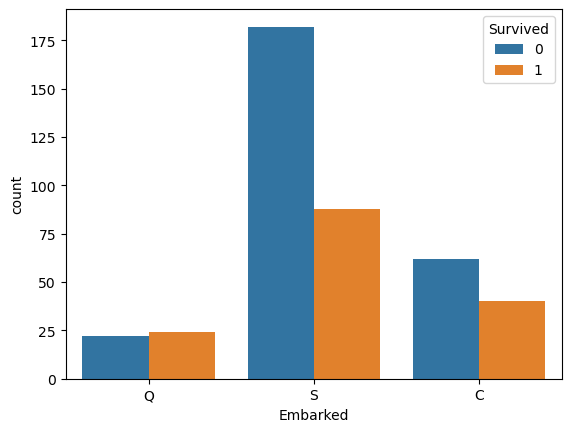

In [507]:
sns.countplot(x='Embarked',hue='Survived',data=df)

C:\Users\yassi\AppData\Local\Temp\ipykernel_7152\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

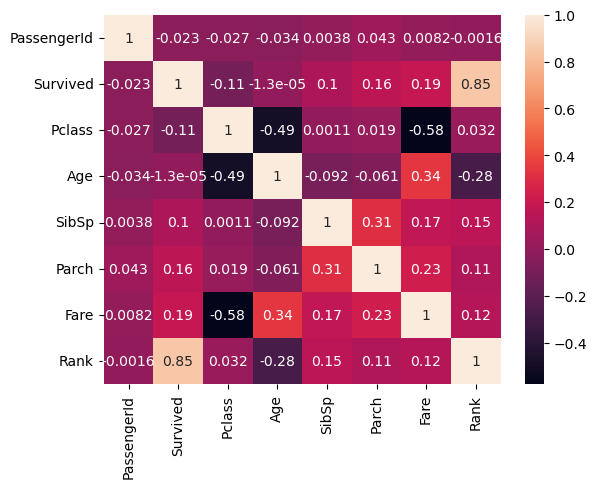

In [508]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Embarked', ylabel='count'>

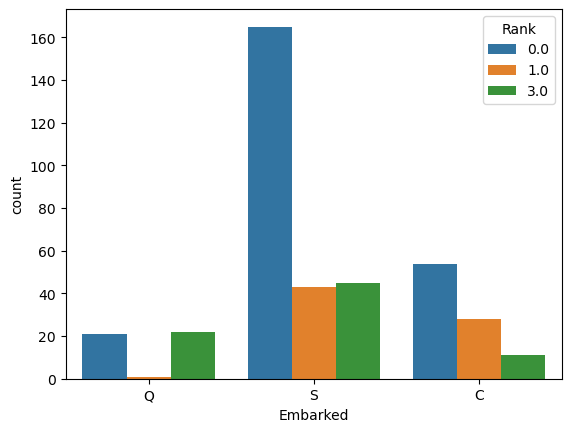

In [509]:
sns.countplot(x='Embarked',hue='Rank',data=df)

<Axes: xlabel='Fare', ylabel='Count'>

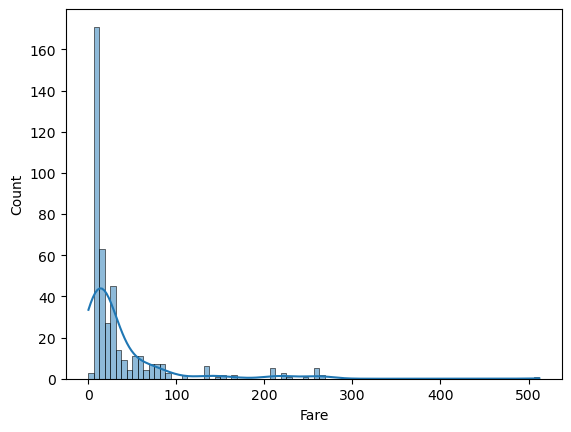

In [510]:
sns.histplot(x='Fare',data=df , kde=True)

In [511]:
df['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

* Group By Cabin 1st Letter (A-B-C-D-E)

In [512]:
# Group by first Letter
def groubCabins(cabin):
    if(pd.notnull(cabin)):
        return cabin[0]
    else:
        return "U" # for Unknown for nan values
df['CabinGroup'] = df['Cabin'].apply(groubCabins)

In [513]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Rank,CabinGroup
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,U
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,U
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,U
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,U
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.0,U
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0,U
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0.0,U


<Axes: xlabel='count', ylabel='CabinGroup'>

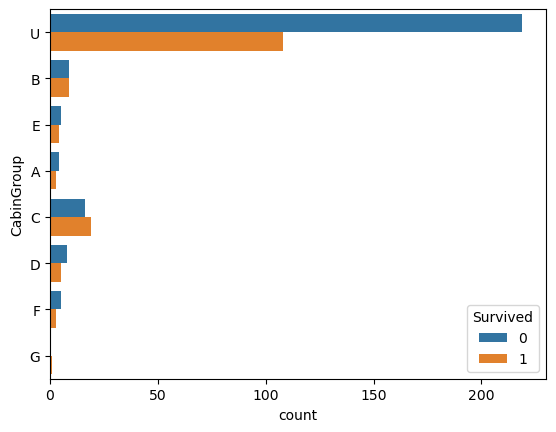

In [514]:
sns.countplot(y='CabinGroup',dodge=True,hue='Survived',data=df)

<Axes: xlabel='CabinGroup', ylabel='count'>

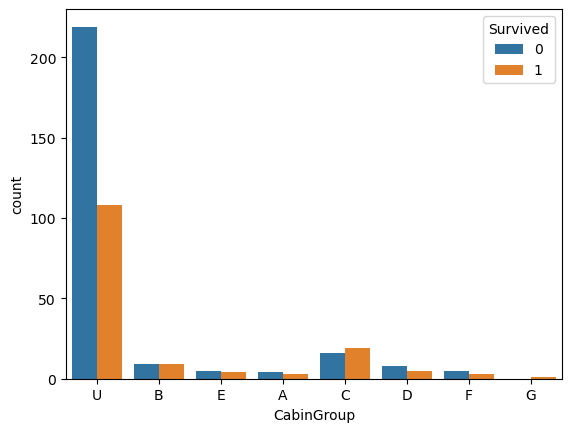

In [515]:
sns.countplot(x='CabinGroup',hue='Survived',data=df)

* Possibility to remove Cabin column

## DATA PREPROCESSING

In [516]:
df['Family'] = df['Parch']+df['SibSp']

In [517]:
#change Survived into Y or N
df['Survived'] = df["Survived"].replace([0,1],['N','Y'])

In [518]:
#change Sex into 0 or 1
df['Sex'] = df["Sex"].replace(['male','female'],[0,1])

In [519]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Rank,CabinGroup,Family
0,892,N,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0.0,U,0
1,893,Y,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,1.0,U,1
2,894,N,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0.0,U,0
3,895,N,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0.0,U,0
4,896,Y,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,1.0,U,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,N,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.0,U,0
414,1306,Y,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,NaN,C,0
415,1307,N,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0,U,0
416,1308,N,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,0.0,U,0


In [520]:
#Remove unNeeded columns 
#Cabin->Replaced by CabinGroup
#Name->Replaced by Rank
#Ticket->no Need
#Fare->No need
#SibSp+Parch->Replaced by Family
#PassagerID->No Need
df.drop('Name',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)
df.drop('SibSp',axis=1,inplace=True)
df.drop('Fare',axis=1,inplace=True)
df.drop('PassengerId',axis=1,inplace=True)

In [521]:
df

,Survived,Pclass,Sex,Age,Embarked,Rank,CabinGroup,Family
0,N,3,0,34.5,Q,0.0,U,0
1,Y,3,1,47.0,S,1.0,U,1
2,N,2,0,62.0,Q,0.0,U,0
3,N,3,0,27.0,S,0.0,U,0
4,Y,3,1,22.0,S,1.0,U,2
...,...,...,...,...,...,...,...,...
413,N,3,0,NaN,S,0.0,U,0
414,Y,1,1,39.0,C,NaN,C,0
415,N,3,0,38.5,S,0.0,U,0
416,N,3,0,NaN,S,0.0,U,0


In [522]:
# fill missing data with mean for age and mode for embarked
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode())

In [523]:
# # replacing the outliers of Age with median value

# # Calculate the IQR (Interquartile Range)
# Q1 = df['Age'].quantile(0.25)
# Q3 = df['Age'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers
# outliers = (df['Age'] < lower_bound) | (df['Age'] > upper_bound)

# # Replace outliers with the median
# median_age = df['Age'].median()
# df.loc[outliers, 'Age'] = median_age

<Axes: xlabel='Age'>

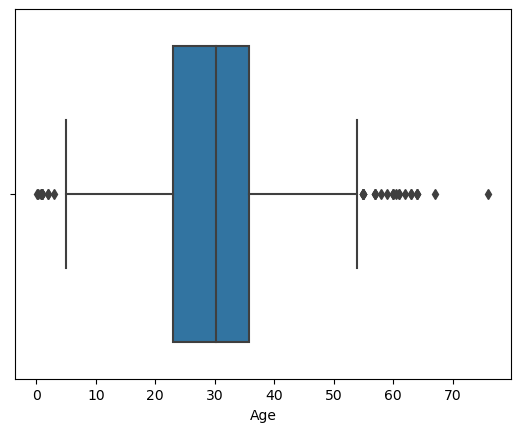

In [524]:
sns.boxplot(x='Age',data=df)

In [525]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
Rank          28
CabinGroup     0
Family         0
dtype: int64

In [534]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols = ['Sex', 'CabinGroup', 'Embarked','Rank','Pclass']

for col in cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [535]:
df

,Survived,Pclass,Sex,Age,Embarked,Rank,CabinGroup,Family
0,N,2,0,34.50000,1,0,7,0
1,Y,2,1,47.00000,2,1,7,1
2,N,1,0,62.00000,1,0,7,0
3,N,2,0,27.00000,2,0,7,0
4,Y,2,1,22.00000,2,1,7,2
...,...,...,...,...,...,...,...,...
413,N,2,0,30.27259,2,0,7,0
414,Y,0,1,39.00000,0,3,2,0
415,N,2,0,38.50000,2,0,7,0
416,N,2,0,30.27259,2,0,7,0


## Model Development

In [527]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [541]:
#Split data
x = df.drop('Survived' , axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

# Instantiate the model
classifier = RandomForestClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           N       1.00      1.00      1.00       109
           Y       1.00      1.00      1.00        59

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168



In [542]:
classifier.score(X_train,y_train)

1.0

In [546]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred_knn)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           N       0.82      0.89      0.85       109
           Y       0.76      0.63      0.69        59

    accuracy                           0.80       168
   macro avg       0.79      0.76      0.77       168
weighted avg       0.79      0.80      0.79       168



In [550]:
knn.score(X_test,y_test)

0.7976190476190477

In [549]:
from sklearn.linear_model  import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = knn.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred_lr)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           N       0.82      0.89      0.85       109
           Y       0.76      0.63      0.69        59

    accuracy                           0.80       168
   macro avg       0.79      0.76      0.77       168
weighted avg       0.79      0.80      0.79       168



In [ ]:
lr.score(X_)